# Numerical Integration Methods | Runge-Kutta

> In numerical analysis, the Runge–Kutta methods are a family of implicit and explicit iterative methods, which include the well-known routine called the Euler Method, used in temporal discretization for the approximate solutions of ordinary differential equations. These methods were developed around 1900 by the German mathematicians C. Runge and M. W. Kutta.

[Wikipedia](https://en.wikipedia.org/wiki/Runge-Kutta_methods)

[More context available here](http://people.bu.edu/andasari/courses/Fall2015/LectureNotes/Lecture9_1Oct2015.pdf)

[Original code adapted from here](http://people.bu.edu/andasari/courses/numericalpython/python.html)

## Setup

* Code written in Jupyter Lab
* SageMath 8.9 Kernel

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from math import sin

In [5]:
def feval(funcName, *args):
    return eval(funcName)(*args)

## 4th order Runge-Kutta Method

In [6]:
def rungekutta(func, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = yinit
    
    # Containers for solutions
    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        k1 = feval(func, x, y)

        yp2 = y + k1*(h/2)

        k2 = feval(func, x+h/2, yp2)

        yp3 = y + k2*(h/2)

        k3 = feval(func, x+h/2, yp3)

        yp4 = y + k3*h

        k4 = feval(func, x+h, yp4)

        for j in range(m):
            y[j] = y[j] + (h/6)*(k1[j] + 2*k2[j] + 2*k3[j] + k4[j])

        x = x + h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])  

    return [xsol, ysol]


## Comparison

Create a function

In [7]:
def myFunc(x, y):
    dy = np.zeros((len(y)))
    #dy[0] = np.exp(-2*x) - 2*y[0]
    dy[0] = sin(x)
    return dy

Initial conditions

In [8]:
step = 0.1
xRange = np.array([0.0, 1])
y0 = np.array([0.0])

Run numerical solvers

In [9]:
[ts, yRK] = rungekutta('myFunc', y0, xRange, step)

Exact solution (numerical)

In [19]:
dt = int((xRange[-1]-xRange[0])/step)
t = [xRange[0]+i*step for i in range(dt+1)] 
yexact = []
for i in range(dt+1):
    #ye = (0.1)*np.exp(-2*t[i]) + t[i]*np.exp(-2*t[i])
    ye = -cos(t[i])+1
    yexact.append(ye)

Compare exact with each Runge-Kutta method

In [20]:
diff = yRK[:1] - yexact
print("Maximum difference for 4th order RK =", np.max(abs(diff)))

('Maximum difference for 4th order RK =', 0.45969769413186023)


Plot the solutions

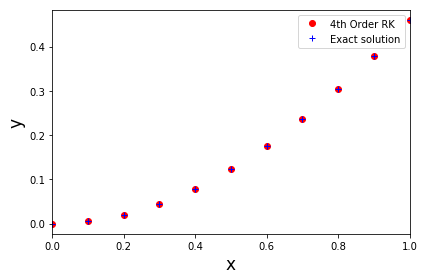

In [21]:
plt.plot(ts, yRK, 'or')
plt.plot(t, yexact, '+b')
plt.xlim(xRange[0], xRange[1])
plt.legend(["4th Order RK","Exact solution"], loc=1)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.tight_layout()
plt.show()

Export the figure

In [ ]:
#plt.savefig('Fig_ex2_RK4_h0p1.png', dpi=600)